### Import Library

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import joblib

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Load Data

In [20]:
df = joblib.load('../data/processed/ori_new.pkl')

In [21]:
df

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


### Data Splitting

In [22]:
target = 'Fire Alarm'
x = df.drop(target, axis=1).copy()
y = df[target].copy()

In [23]:
x

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


In [24]:
y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire Alarm, Length: 62630, dtype: int64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42, stratify = y_test)

In [26]:
joblib.dump(x_train, '../data/processed/x_train.pkl')
joblib.dump(y_train, '../data/processed/y_train.pkl')
joblib.dump(x_valid, '../data/processed/x_valid.pkl')
joblib.dump(y_valid, '../data/processed/y_valid.pkl')
joblib.dump(x_test, '../data/processed/x_test.pkl')
joblib.dump(y_test, '../data/processed/y_test.pkl')

['../data/processed/y_test.pkl']

In [27]:
# combine x dan y pada data train, agar lebih simple
train_set = pd.concat([x_train, y_train], axis = 1)

### Checking Null Value

In [28]:
train_set.isnull().sum().sort_values(ascending=True)

Temperature    0
Humidity       0
TVOC           0
eCO2           0
Raw H2         0
Raw Ethanol    0
Pressure       0
PM1.0          0
PM2.5          0
NC0.5          0
NC1.0          0
NC2.5          0
Fire Alarm     0
dtype: int64

### Data Exploration

In [30]:
train_set.head()

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
43502,27.120,47.37,1228,405,12909,19428,938.728,1.66,1.73,11.46,1.787,0.040,1
16652,13.211,47.92,1264,424,12869,19410,938.763,2.24,2.33,15.44,2.408,0.054,1
53451,28.170,43.68,125,400,12793,20595,937.321,1.85,1.93,12.76,1.991,0.045,0
28269,20.540,58.07,202,400,13188,20014,939.689,2.25,2.34,15.48,2.414,0.055,1
11367,10.413,47.82,1073,629,12797,19449,939.098,2.07,2.15,14.27,2.226,0.050,1


#### Check Correlation

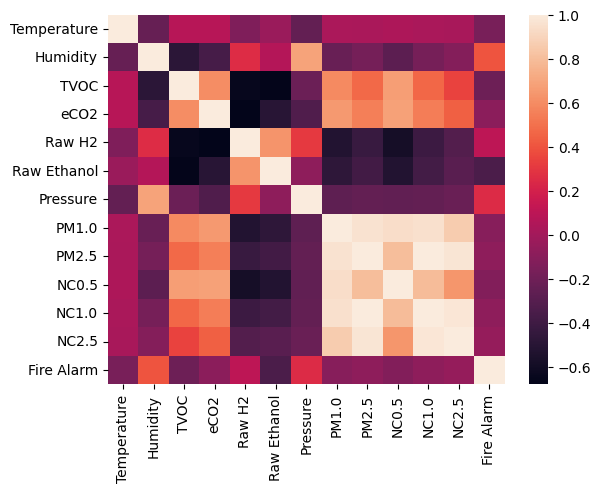

In [83]:
sns.heatmap(train_set.corr(numeric_only = True))
plt.show()

In [85]:
train_set.corr()

,Temperature,Humidity,TVOC,eCO2,Raw H2,Raw Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature,1.000000,-0.238081,0.080934,0.078505,-0.140333,-0.035417,-0.249255,0.032693,0.026579,0.036309,0.026064,0.019740,-0.163384
Humidity,-0.238081,1.000000,-0.485137,-0.370216,0.252846,0.066486,0.690161,-0.233247,-0.175432,-0.275708,-0.170806,-0.115710,0.397123
TVOC,0.080934,-0.485137,1.000000,0.601624,-0.652902,-0.672761,-0.217595,0.593089,0.474083,0.668171,0.464200,0.343804,-0.211046
eCO2,0.078505,-0.370216,0.601624,1.000000,-0.679608,-0.501463,-0.327683,0.645757,0.552871,0.684418,0.544574,0.439299,-0.094535
Raw H2,-0.140333,0.252846,-0.652902,-0.679608,1.000000,0.628097,0.308569,-0.522954,-0.424456,-0.581601,-0.416174,-0.314542,0.106201
Raw Ethanol,-0.035417,0.066486,-0.672761,-0.501463,0.628097,1.000000,-0.077239,-0.474496,-0.387926,-0.524418,-0.380599,-0.290356,-0.346068
Pressure,-0.249255,0.690161,-0.217595,-0.327683,0.308569,-0.077239,1.000000,-0.267641,-0.252741,-0.255951,-0.250886,-0.223856,0.247576
PM1.0,0.032693,-0.233247,0.593089,0.645757,-0.522954,-0.474496,-0.267641,1.000000,0.957490,0.940865,0.951442,0.859710,-0.107519
PM2.5,0.026579,-0.175432,0.474083,0.552871,-0.424456,-0.387926,-0.252741,0.957490,1.000000,0.803143,0.999794,0.970507,-0.082193
NC0.5,0.036309,-0.275708,0.668171,0.684418,-0.581601,-0.524418,-0.255951,0.940865,0.803143,1.000000,0.790893,0.635828,-0.125538


#### Checking Imbalance & Treatment SMOTE

In [46]:
train_set[target].value_counts()

1    31330
0    12511
Name: Fire Alarm, dtype: int64

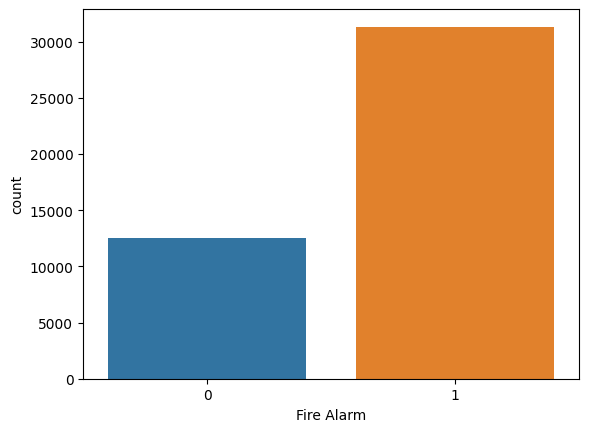

In [41]:
sns.countplot(data=train_set, x=target)
plt.show()

> data target terlihat imbalance --> lakukan treatment imbalance data SMOTE

>Random oversampling just increases the size of the training data set through repetition of the original examples. It does not cause any >increase in the variety of training examples.

>Oversampling using SMOTE not only increases the size of the training data set, it also increases the variety.

>SMOTE creates new (artificial) training examples based on the original training examples. For instance, if it sees two examples (of the same >class) near each other, it creates a third artificial one, bang in the middle of the original two.

In [43]:
sm = SMOTE(random_state = 112)
x_sm, y_sm = sm.fit_resample(train_set.drop(target, axis = 1), train_set[target])
train_set_sm = pd.concat([x_sm, y_sm], axis = 1)

In [49]:
train_set_sm[target].value_counts()

1    31330
0    31330
Name: Fire Alarm, dtype: int64

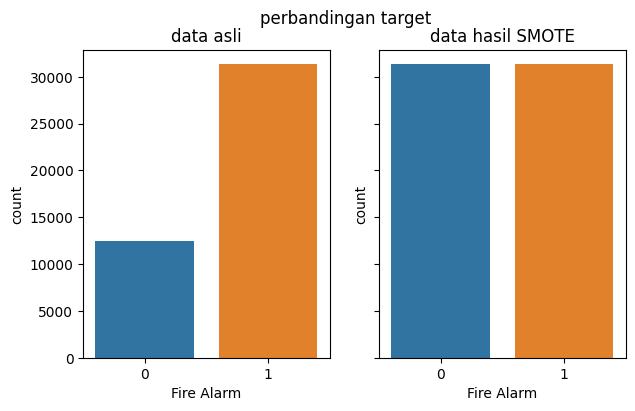

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,4), sharey=True)
fig.suptitle('perbandingan target')
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')

sns.countplot(data=train_set, x=target, ax=ax[0])
sns.countplot(data=train_set_sm, x=target, ax=ax[1])
plt.show()

In [48]:
train_set[target].value_counts()

1    31330
0    12511
Name: Fire Alarm, dtype: int64

### Distribution

In [74]:
train_set.columns

Index(['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw H2', 'Raw Ethanol',
       'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Fire Alarm'],
      dtype='object')

#### Temperature

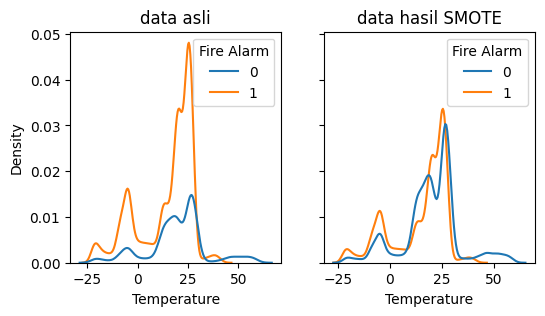

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil SMOTE')

sns.kdeplot(data=train_set, x='Temperature', hue='Fire Alarm', ax=ax[0])
sns.kdeplot(data=train_set_sm, x='Temperature', hue='Fire Alarm', ax=ax[1])
plt.show()